In [2]:
import numpy as np
import cv2

import PIL.Image as img
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [4]:
Image_shape = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4',input_shape =Image_shape+(3,))
])

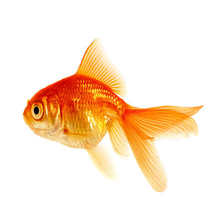

In [5]:
g_fish = img.open('gold_fish.jpg').resize(Image_shape)
g_fish

In [6]:
g_fish = np.array(g_fish)/255

In [7]:
g_fish

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [8]:
g_fish.shape

(224, 224, 3)

In [9]:
g_fish = g_fish[np.newaxis,...]

In [10]:
g_fish.shape

(1, 224, 224, 3)

In [11]:
result = classifier.predict(g_fish)
result

1/1 [==============================] - 1s 1s/step


array([[ 0.18493018,  3.6982346 ,  9.15661   , ..., -1.5260888 ,
         0.6283983 ,  0.16965164]], dtype=float32)

In [12]:
result.shape

(1, 1001)

In [13]:
pred = np.argmax(result)
pred

2

#Using different data for pretrained model

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [15]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [16]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/9410186154_465642ed35.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5032376020_2ed312306c.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5027895361_ace3b731e5_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4746643626_02b2d056a2_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/2619000556_6634478e64_n.jpg')]

In [17]:
image_len = len(list(data_dir.glob('*/*.jpg')))
image_len

3670

In [18]:
roses = list(data_dir.glob('*roses/*.jpg'))
roses[:5]


[PosixPath('datasets/flower_photos/roses/4505921907_21c8002fde.jpg'),
 PosixPath('datasets/flower_photos/roses/5628552852_60bbe8d9b0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15750320284_22ef21c682.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14408977935_a397e796b8_m.jpg')]

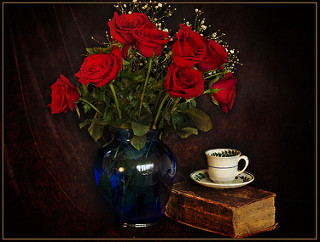

In [19]:
img.open(roses[9])

In [20]:
tulips = list(data_dir.glob('*tulips/*.jpg'))
tulips[:5]


[PosixPath('datasets/flower_photos/tulips/4546299243_23cd58eb43.jpg'),
 PosixPath('datasets/flower_photos/tulips/4263272885_1a49ea5209.jpg'),
 PosixPath('datasets/flower_photos/tulips/12025042086_78bafc0eb6_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2238626027_058c404b94.jpg'),
 PosixPath('datasets/flower_photos/tulips/142235914_5419ff8a4a.jpg')]

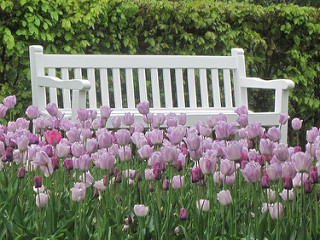

In [21]:
img.open(tulips[2])

In [22]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [23]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [24]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[144, 117, 191],
        [145, 118, 192],
        [143, 116, 190],
        ...,
        [ 43,  72,  39],
        [ 43,  72,  39],
        [ 42,  71,  38]],

       [[148, 118, 193],
        [148, 118, 193],
        [147, 117, 192],
        ...,
        [ 43,  72,  39],
        [ 43,  72,  39],
        [ 42,  71,  38]],

       [[148, 118, 193],
        [148, 118, 193],
        [147, 117, 192],
        ...,
        [ 42,  71,  38],
        [ 42,  71,  38],
        [ 42,  71,  38]],

       ...,

       [[ 28,  19,  92],
        [ 31,  18,  92],
        [ 29,  20,  93],
        ...,
        [  0,   5,   3],
        [  0,   5,   3],
        [  0,   5,   3]],

       [[ 29,  18,  91],
        [ 31,  18,  92],
        [ 28,  19,  92],
        ...,
        [  1,   4,   2],
        [  1,   4,   2],
        [  1,   4,   2]],

       [[ 30,  18,  94],
        [ 32,  19,  93],
        [ 27,  20,  93],
        ...,
        [  1,   4,   2],
        [  1,   4,   2],
        [  1,   4,   2]]

In [25]:
img.shape

(333, 500, 3)

In [26]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [27]:
X = np.array(X)
y = np.array(y)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

(-0.5, 223.5, 223.5, -0.5)

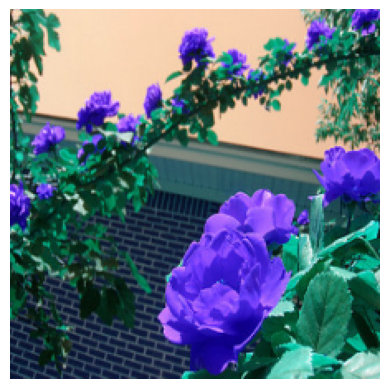

In [30]:
plt.imshow(X[1])
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

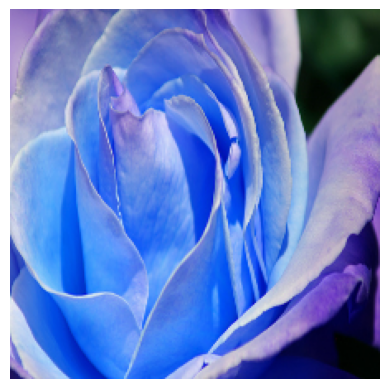

In [31]:
plt.imshow(X[0])
plt.axis('off')

(-0.5, 223.5, 223.5, -0.5)

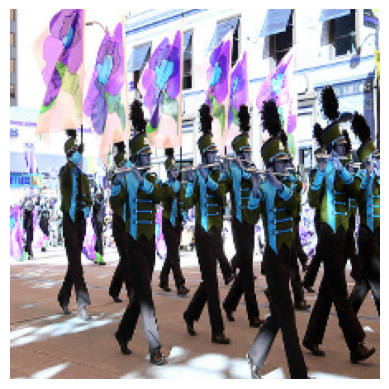

In [32]:
plt.imshow(X[2])
plt.axis('off')

In [33]:
predict = classifier.predict(np.array([X[0],X[1],X[2]]))
predict

1/1 [==============================] - 1s 627ms/step


array([[ 0.26050678,  0.76662755,  2.9923465 , ..., -1.4610562 ,
        -2.1580539 ,  3.3589215 ],
       [ 0.21014443, -0.33211803,  1.301212  , ..., -2.2193503 ,
        -1.2719507 ,  4.0586524 ],
       [ 0.2800974 , -0.54734546,  0.9503311 , ..., -1.6548954 ,
        -0.4343811 ,  4.100521  ]], dtype=float32)

In [34]:
np.argmax(predict,axis=1)

array([795, 550, 795])

In [35]:
feature_vector = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained = hub.KerasLayer(
    feature_vector, input_shape = (224,224,3), trainable=False
)

In [36]:
model = tf.keras.Sequential([
    pretrained,
    tf.keras.layers.Dense(5)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test,y_test)